# Lesson 4

In [1]:
# Paths
import pathlib

MAIN_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = MAIN_PATH / "notebooks" / "lessons" / "lesson-4" / "data"
SAVE_DIRECTORY = MAIN_PATH / "lesson-4"

In [ ]:
# Import data 
import geopandas

# data grid on travel time to the Helsinki railway station
grid = geopandas.read_file(
    DATA_DIRECTORY 
    / "helsinki_region_travel_times_to_railway_station"
    / "helsinki_region_travel_times_to_railway_station.gpkg"
)

# Helsinki municipality geography
helsinki = geopandas.read_file(
    DATA_DIRECTORY 
    / "helsinki_municipality" 
    / "helsinki_municipality.gpkg"
)

In [8]:
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


<AxesSubplot: >

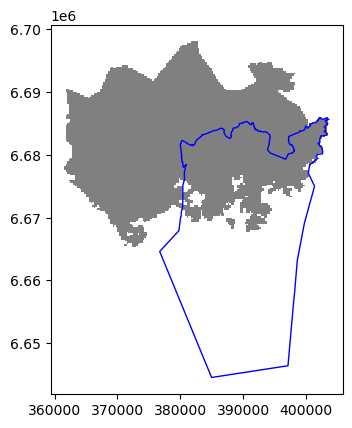

In [10]:
# Plot the layers
ax = grid.plot(facecolor="gray")
helsinki.plot(ax=ax, facecolor="None", edgecolor="blue")

In [11]:
# Check the crs of the municipality polygon
print(helsinki.crs)

epsg:3067


In [12]:
# Ensure that the CRS matches, if not raise an AssertionError
assert helsinki.crs == grid.crs, "CRS differs between layers!"

In [17]:
# select grid cells that intersect (are inside) the Helsinki municiplality area
intersection = grid.overlay(helsinki, how="intersection")

<AxesSubplot: >

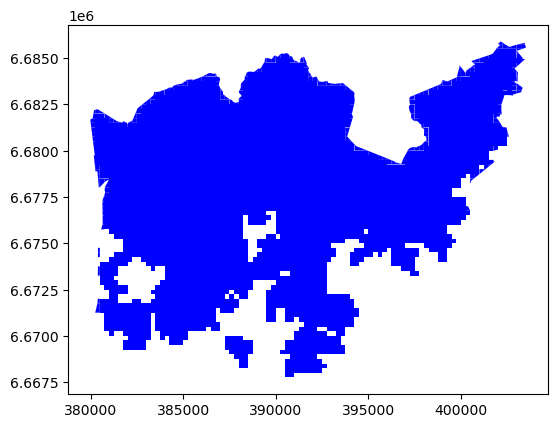

In [16]:
intersection.plot(color="b")

In [18]:
intersection.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402024.224 6685750.000, 402003.328 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403148.515 6685750.000, 403243.781 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((401900.425 6685500.000, 402000.000 6..."


In [19]:
# Save the output
intersection.to_file(
    SAVE_DIRECTORY / "intersection.gpkg",
    layer="travel_time_matrix_helsinki_region"
) 

## Aggregating data

In [20]:
import geopandas

intersection = geopandas.read_file(SAVE_DIRECTORY / "intersection.gpkg")

In [21]:
# Conduct the aggregation
dissolved = intersection.dissolve(by="car_r_t")

# What did we get
dissolved.head()

,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
car_r_t,,,,,,,,,,,,,,,,,,
-1,"MULTIPOLYGON (((384750.000 6670000.000, 384500...",-1,-1,-1,5913094,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091
0,"POLYGON ((385750.000 6672000.000, 385750.000 6...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091
7,"POLYGON ((386250.000 6671750.000, 386000.000 6...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091
8,"MULTIPOLYGON (((386000.000 6671500.000, 385750...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10,27517366,Helsinki,Helsingfors,091
9,"MULTIPOLYGON (((385000.000 6671250.000, 385000...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091


In [22]:
# comparing the number of cells in the layers before and after the aggregation
print(f"Rows in original intersection GeoDataFrame: {len(intersection)}")
print(f"Rows in dissolved layer: {len(dissolved)}")

Rows in original intersection GeoDataFrame: 3826
Rows in dissolved layer: 51


In [23]:
# the column car_r_t was removed...
dissolved.columns

Index(['geometry', 'car_m_d', 'car_m_t', 'car_r_d', 'from_id', 'pt_m_d',
       'pt_m_t', 'pt_m_tt', 'pt_r_d', 'pt_r_t', 'pt_r_tt', 'to_id', 'walk_d',
       'walk_t', 'GML_ID', 'NAMEFIN', 'NAMESWE', 'NATCODE'],
      dtype='object')

In [24]:
# ...and is being used as the index
dissolved.index

Int64Index([-1,  0,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
            39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            56],
           dtype='int64', name='car_r_t')

In [25]:
# selecting geometries that are 15 min away
dissolved.loc[15]

geometry    MULTIPOLYGON (((384000.00013620744 6670750.000...
car_m_d                                                  7458
car_m_t                                                    13
car_r_d                                                  7458
from_id                                               5934913
pt_m_d                                                   6858
pt_m_t                                                     26
pt_m_tt                                                    30
pt_r_d                                                   6858
pt_r_t                                                     27
pt_r_tt                                                    32
to_id                                                 5975375
walk_d                                                   6757
walk_t                                                     97
GML_ID                                               27517366
NAMEFIN                                              Helsinki
NAMESWE 

In [26]:
# See the type
type(dissolved.loc[15])

pandas.core.series.Series

In [27]:
# See the data
dissolved.loc[15].head()

geometry    MULTIPOLYGON (((384000.00013620744 6670750.000...
car_m_d                                                  7458
car_m_t                                                    13
car_r_d                                                  7458
from_id                                               5934913
Name: 15, dtype: object

In [28]:
# Geodataframe with the grid cells that are 15min away
selection = geopandas.GeoDataFrame([dissolved.loc[15]], crs=dissolved.crs)

<AxesSubplot: >

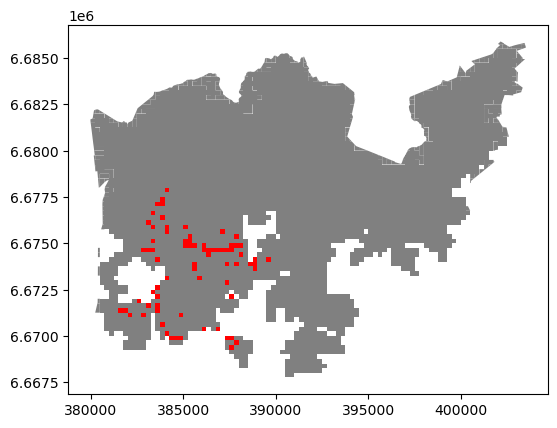

In [30]:
# Plot all the grid cells, and then the grid cells that are 15 min away
ax = dissolved.plot(facecolor="gray")
selection.plot(ax=ax, facecolor="r")

In [32]:
# Reseting the index
dissolved = dissolved.reset_index()
dissolved.head()

,index,car_r_t,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
0,0,-1,"MULTIPOLYGON (((384750.000 6670000.000, 384500...",-1,-1,-1,5913094,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091
1,1,0,"POLYGON ((385750.000 6672000.000, 385750.000 6...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091
2,2,7,"POLYGON ((386250.000 6671750.000, 386000.000 6...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091
3,3,8,"MULTIPOLYGON (((386000.000 6671500.000, 385750...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10,27517366,Helsinki,Helsingfors,091
4,4,9,"MULTIPOLYGON (((385000.000 6671250.000, 385000...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091


<AxesSubplot: >

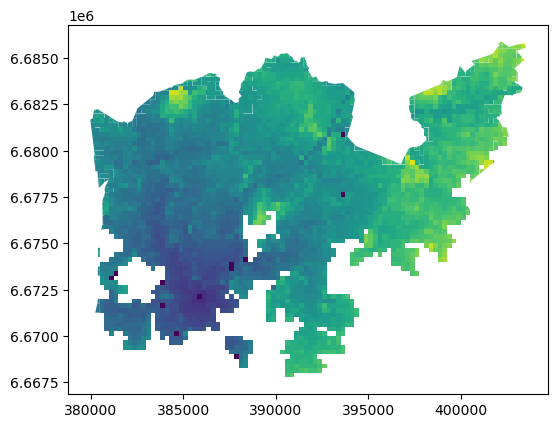

In [33]:
# Use one of the columns as a variable to be ploted (with colors)
dissolved.plot(column="car_r_t")

## Simplifying geometries

In [34]:
import geopandas

amazon = geopandas.read_file(DATA_DIRECTORY / "amazon_river" / "amazon_river.gpkg")
amazon.head()

,bbox_east,bbox_north,bbox_south,bbox_west,place_name,geometry
0,-49.10927,0.70653,-4.44219,-73.450126,"Rio Amazonas, Microrregião de Manaus, Mesorreg...","MULTILINESTRING ((1612358.589 9508606.173, 161..."


In [35]:
amazon.crs

<Derived Projected CRS: PROJCS["Mercator_2SP",GEOGCS["GCS_GRS 1980(IUGG, 1 ...>
Name: Mercator_2SP
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Unknown

<AxesSubplot: >

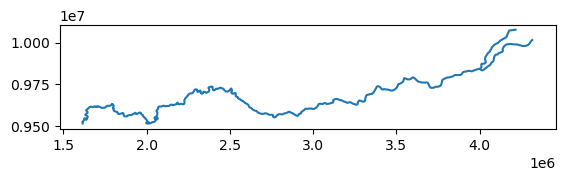

In [36]:
amazon.plot()

<AxesSubplot: >

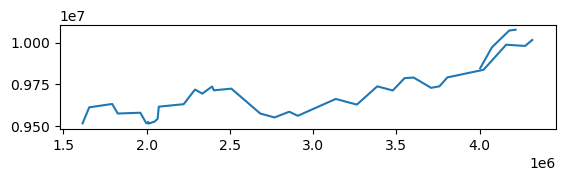

In [37]:
# Generalize geometry
amazon['simplegeom'] = amazon.simplify(tolerance=20000)

# Set geometry to be our new simplified geometry
amazon = amazon.set_geometry('simplegeom')

# Plot
amazon.plot()

## Reclassifying data

In [38]:
import geopandas
accessibility_grid = geopandas.read_file(
    DATA_DIRECTORY
    / "helsinki_region_travel_times_to_railway_station"
    / "helsinki_region_travel_times_to_railway_station.gpkg"
)
accessibility_grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [40]:
# remove NoData values (-1 values)
accessibility_grid = accessibility_grid.loc[accessibility_grid["pt_r_tt"] >= 0]

<AxesSubplot: >

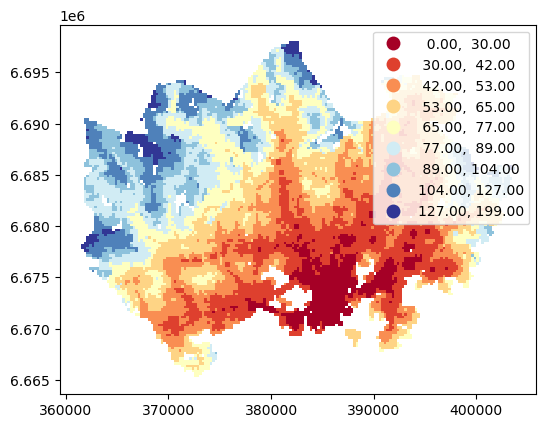

In [41]:
# Plot using 9 classes and classify the values using "Natural Breaks" classification
accessibility_grid.plot(column="pt_r_tt", scheme="Natural_Breaks", k=9, cmap="RdYlBu", linewidth=0, legend=True)

<AxesSubplot: >

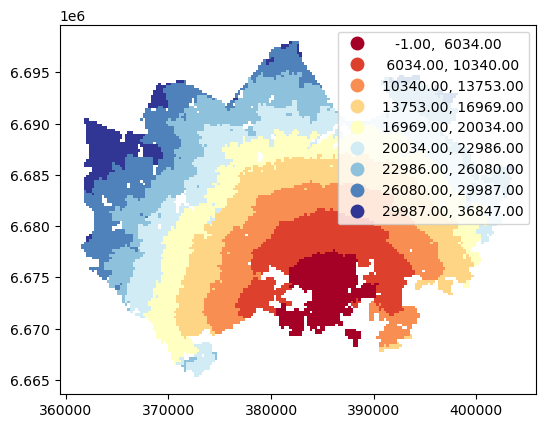

In [42]:
# Plot walking distance
accessibility_grid.plot(column="walk_d", scheme="Natural_Breaks", k=9, cmap="RdYlBu", linewidth=0, legend=True)

In [43]:
import mapclassify

mapclassify.NaturalBreaks(y=accessibility_grid["pt_r_tt"], k=9)

NaturalBreaks           

    Interval       Count
------------------------
[  0.00,  31.00] |   926
( 31.00,  43.00] |  2272
( 43.00,  54.00] |  2453
( 54.00,  66.00] |  2222
( 66.00,  77.00] |  1548
( 77.00,  89.00] |  1483
( 89.00, 103.00] |  1079
(103.00, 125.00] |   811
(125.00, 199.00] |   226

In [44]:
# in quantiles (default is 5 classes)
mapclassify.Quantiles(y=accessibility_grid["pt_r_tt"])

Quantiles               

    Interval       Count
------------------------
[  0.00,  41.00] |  2674
( 41.00,  52.00] |  2576
( 52.00,  66.00] |  2623
( 66.00,  85.00] |  2616
( 85.00, 199.00] |  2531

In [45]:
# Extract threshold values
classifier = mapclassify.NaturalBreaks(y=accessibility_grid["pt_r_tt"], k=9)
classifier.bins

array([ 30.,  41.,  52.,  64.,  77.,  90., 104., 126., 199.])

In [47]:
# Using a Pysal classifiers
# create a Natural Breaks classifier
classifier = mapclassify.NaturalBreaks.make(k=9)

In [48]:
# Classify the data
classifications = accessibility_grid[["pt_r_tt"]].apply(classifier)
classifications.head()

,pt_r_tt
0,8
1,8
2,8
3,8
4,7


In [49]:
type(classifications)

pandas.core.frame.DataFrame

In [50]:
# add the classification to our dataframe
accessibility_grid["nb_pt_r_tt"] = classifications
accessibility_grid[["pt_r_tt", "nb_pt_r_tt"]].head()

,pt_r_tt,nb_pt_r_tt
0,139,8
1,133,8
2,133,8
3,144,8
4,121,7


<AxesSubplot: >

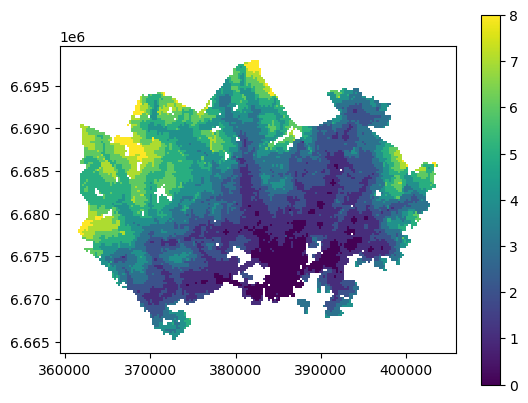

In [51]:
# Plot
accessibility_grid.plot(column="nb_pt_r_tt", linewidth=0, legend=True)

### Ploting a histogram

<AxesSubplot: ylabel='Frequency'>

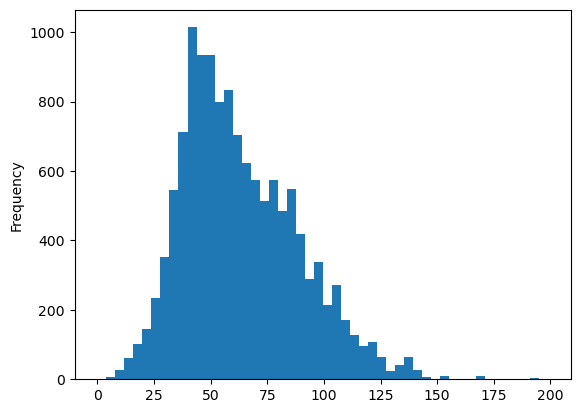

In [52]:
# Ploting a Histogram
accessibility_grid["pt_r_tt"].plot.hist(bins=50)

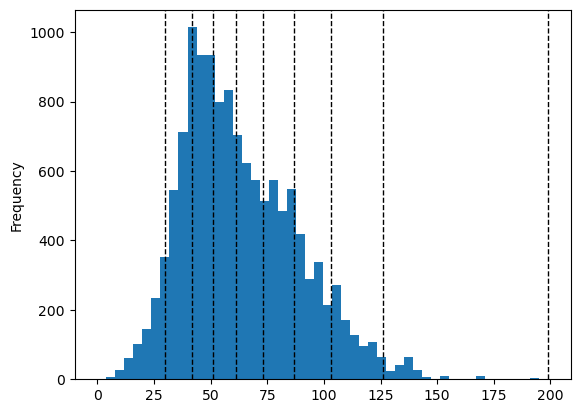

In [55]:
# Add Natural Breaks
import matplotlib.pyplot as plt

# Define the classifier
classifier = mapclassify.NaturalBreaks(y=accessibility_grid["pt_r_tt"], k=9)

#Plot the histogram
accessibility_grid["pt_r_tt"].plot.hist(bins=50)

# Add the vertical lines for class breaks
for break_point in classifier.bins:
    plt.axvline(break_point, color="k", linestyle="dashed", linewidth=1)

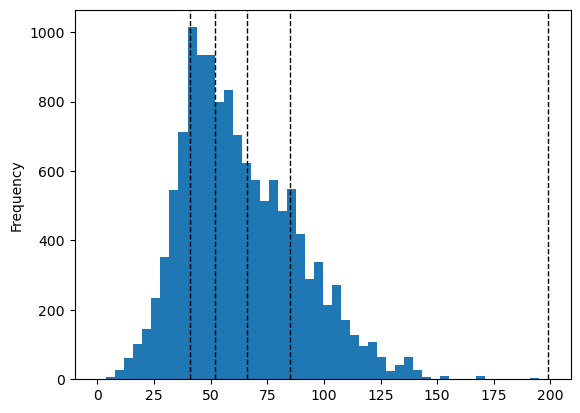

In [56]:
# or divide by quantiles
# Define classifier
classifier = mapclassify.Quantiles(y=accessibility_grid['pt_r_tt'])

# Plot histogram for public transport rush hour travel time
accessibility_grid["pt_r_tt"].plot.hist(bins=50)

for break_point in classifier.bins:
    plt.axvline(break_point, color="k", linestyle="dashed", linewidth=1)

### Custom classifier

In [60]:
# How to classify one row???
int(accessibility_grid.iloc[0]["pt_r_tt"] < 20 and accessibility_grid.iloc[0]["walk_d"] > 4000)

0

In [61]:
# Now apply to each row in the df
accessibility_grid["suitible_area"] = accessibility_grid.apply(lambda row: int(row["pt_r_tt"] < 20 and row["walk_d"] > 4000), axis=1)
accessibility_grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,nb_pt_r_tt,suitible_area
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6...",8,0
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6...",8,0
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6...",8,0
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6...",8,0
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6...",7,0


In [63]:
# Get values counts
accessibility_grid["suitible_area"].value_counts()

0    13011
1        9
Name: suitible_area, dtype: int64

<AxesSubplot: >

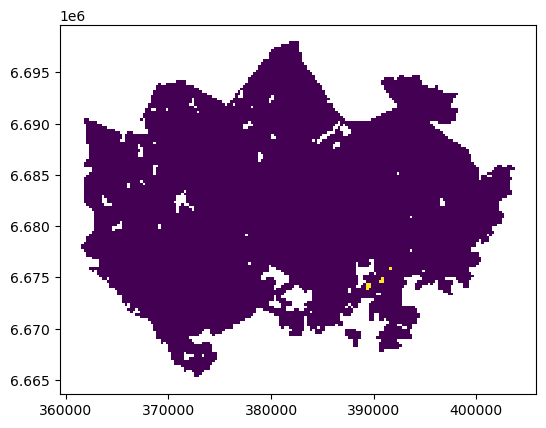

In [65]:
# Plot the suitible locations
accessibility_grid.plot(column="suitible_area", linewidth=0)